#Numerical regression

in this example we will use Keras to predict wages based on various professional and demographic factors.

In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib


sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [ ]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load data
data = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/Iteration3_2933samples_ASE+SDA+VIEW/atrium_SDA+ASE_v3_2933_samples.csv')
#pd.set_option('display.max_columns', None)
#data.dropna(inplace=True)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  2933 non-null   float64
 1   typicalFacadeWindowWidth   2933 non-null   int64  
 2   groundFacadeGlazingRatio   2933 non-null   float64
 3   groundFacadeWindowWidth    2933 non-null   int64  
 4   buildingDepth              2933 non-null   int64  
 5   balconyWidth               2933 non-null   int64  
 6   atriumArea                 2933 non-null   int64  
 7   aspectRatio                2933 non-null   float64
 8   groundFloorHeight          2933 non-null   float64
 9   typicalfloorHeight         2933 non-null   float64
 10  numberLevels               2933 non-null   int64  
 11  groundSDA                  2933 non-null   float64
 12  firstSDA                   2933 non-null   float64
 13  groundASE                  2933 non-null   float

In [ ]:
data.shape

(2933, 17)

In [ ]:
for colname, col in data.iteritems():
  print(colname, "min_val", col.min(), "max_val", col.max())

typicalFacadeGlazingRatio min_val 0.7 max_val 0.9
typicalFacadeWindowWidth min_val 2 max_val 4
groundFacadeGlazingRatio min_val 0.7 max_val 0.9
groundFacadeWindowWidth min_val 2 max_val 4
buildingDepth min_val 15 max_val 40
balconyWidth min_val 1 max_val 6
atriumArea min_val 1000 max_val 3900
aspectRatio min_val 0.5 max_val 1.5
groundFloorHeight min_val 3.0 max_val 6.0
typicalfloorHeight min_val 2.5 max_val 3.0
numberLevels min_val 1 max_val 10
groundSDA min_val 26.1 max_val 100.0
firstSDA min_val 15.2 max_val 100.0
groundASE min_val 5.6 max_val 64.4
firstASE min_val 5.0 max_val 34.4
groundViewPercentage min_val 65.1 max_val 90.3
firstViewPercentage min_val 65.1 max_val 90.5


##Prepare Data

**NORMALIZE INPUTS**

In [ ]:
#same code as last time

#declare features
#X = data.iloc[:,1:-1]
X = data[["typicalFacadeGlazingRatio", "typicalFacadeWindowWidth", "groundFacadeGlazingRatio", "groundFacadeWindowWidth", "buildingDepth", "balconyWidth", "atriumArea", "aspectRatio", "groundFloorHeight", "typicalfloorHeight", "numberLevels"]]   

# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)

print(X_scaled.shape)

(2933, 11)


In [ ]:
#declare regression target
#y = data.loc[:,"wage_per_hour"].to_numpy()
y = data.loc[:, ["groundSDA", "firstSDA", "groundASE", "firstASE", "groundViewPercentage", "firstViewPercentage"]].to_numpy()

#y = y.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()


#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.fit_transform(y)

print(y_scaled.shape)
print(y_scaled)


(2933, 6)
[[1.         0.25707547 0.2755102  0.24489796 0.48015873 0.47637795]
 [0.32070365 0.09316038 0.1377551  0.10204082 0.91269841 0.51574803]
 [0.73612991 0.10259434 0.23809524 0.10884354 0.50793651 0.51968504]
 ...
 [0.9932341  0.20518868 0.24659864 0.24489796 0.51984127 0.84645669]
 [0.29499323 0.17688679 0.15646259 0.18707483 0.87301587 0.56299213]
 [0.29499323 0.19929245 0.08163265 0.26190476 0.54365079 0.16141732]]


**SPLIT INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

In [ ]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way 
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)
print(X_test)
print(y_test)

TRAIN input (2346, 11) output (2346, 6)
TEST input (587, 11) output (587, 6)
[[-0.00911671 -1.22782842 -1.4195245  ...  0.46122863  0.33861712
  -1.53896723]
 [-0.00911671  0.00462222  1.38321219 ... -0.00573153 -0.99091972
   0.89584329]
 [-0.00911671 -1.22782842 -1.4195245  ... -0.47269168 -0.99091972
  -0.495477  ]
 ...
 [-0.00911671  0.00462222 -0.01815615 ... -0.00573153  1.00338554
   0.54801322]
 [-1.41644867  1.23707285 -0.01815615 ... -0.58943172  0.33861712
  -1.53896723]
 [-0.00911671 -1.22782842 -0.01815615 ... -0.58943172  1.66815396
  -1.19113715]]
[[1.         0.48113208 0.51870748 0.63605442 0.52380952 0.04330709]
 [0.97158322 0.17570755 0.23469388 0.22108844 0.38888889 0.95669291]
 [0.23545332 0.12028302 0.14965986 0.1292517  0.51984127 0.22834646]
 ...
 [0.35994587 0.09080189 0.15986395 0.1292517  0.51587302 0.53543307]
 [0.99729364 0.62617925 0.3962585  0.52380952 0.1984127  0.43700787]
 [0.31123139 0.14740566 0.18707483 0.13605442 0.52380952 0.49212598]]


#Build model

From the cheatSheet
Regression between 0 and 1>> 
      activation = relu for hidden layers / sigmoid for final layer
      loss = mean squared error
      optimizer = adam
      input from data, is 8 columns
      output is 1 value prediction

In [ ]:
# Instantiate a sequential model
#tf.seed(5)
#model.save()
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]  

# Add 2 dense layers of 50 and 32 neurons each
model.add(tf.keras.layers.Dense(50, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
  
# Add a dense layer with 1 value output
#model.add(tf.keras.layers.Dense(1, activation= "linear"))
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 50)                600       
                                                                 
 dense_64 (Dense)            (None, 32)                1632      
                                                                 
 dense_65 (Dense)            (None, 6)                 198       
                                                                 
Total params: 2,430
Trainable params: 2,430
Non-trainable params: 0
_________________________________________________________________


#Train model

In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=200, validation_split=0.2)

Epoch 1/200
59/59 [==============================] - 1s 5ms/step - loss: 0.0781 - val_loss: 0.0391
Epoch 2/200
59/59 [==============================] - 0s 3ms/step - loss: 0.0301 - val_loss: 0.0218
Epoch 3/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.0154
Epoch 4/200
59/59 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0121
Epoch 5/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0100
Epoch 6/200
59/59 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.0085
Epoch 7/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 8/200
59/59 [==============================] - 1s 9ms/step - loss: 0.0065 - val_loss: 0.0066
Epoch 9/200
59/59 [==============================] - 0s 8ms/step - loss: 0.0058 - val_loss: 0.0060
Epoch 10/200
59/59 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 11/

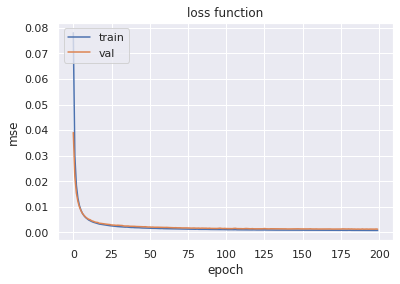

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Evaluate model on test data



In [ ]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

19/19 [==============================] - 0s 1ms/step - loss: 0.0013
mse_test: 0.0012735347263514996


#Plot error


In [ ]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

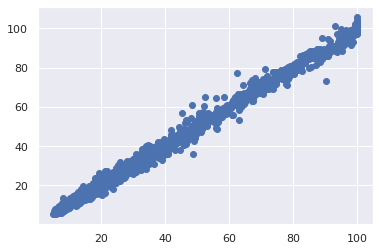

In [ ]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)

plt.scatter(y_truth,y_pred)

In [ ]:
#GROUND DAYLIGHT PREDICTIONS
y_pred_01 = y_pred[:,0]
print(y_pred_01.shape)

(587,)


In [ ]:
#GROUND DAYLIGHT TRUTH
y_truth_01 = y_truth[:,0]
print(y_truth_01.shape)

(587,)


In [ ]:
buildingDepth = (scalerX.inverse_transform(X_test)[:,4])

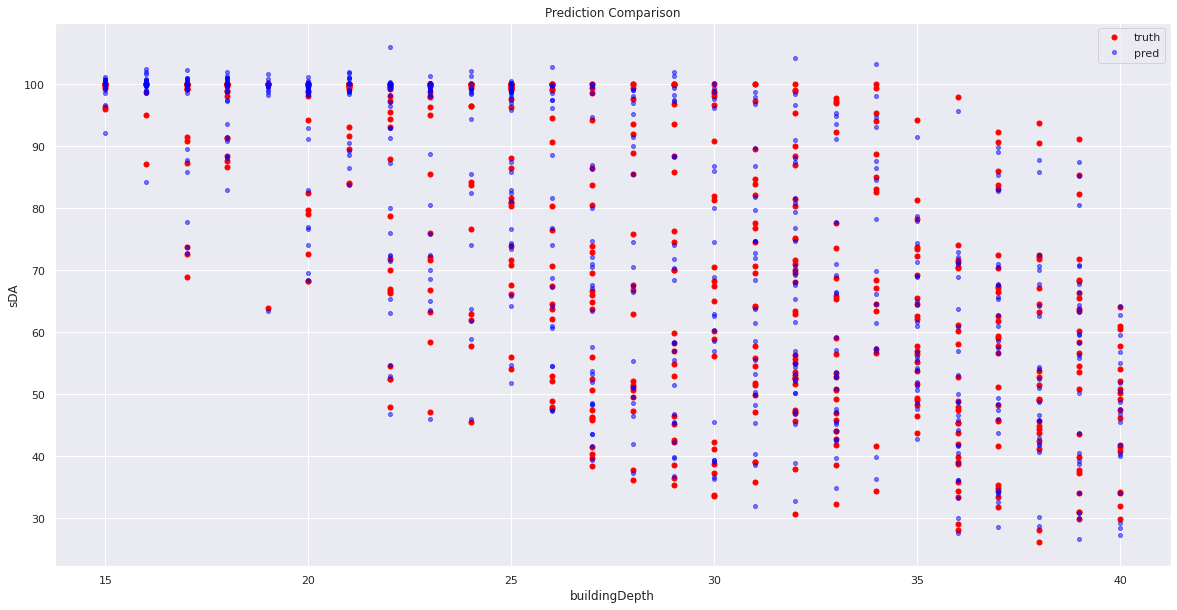

In [ ]:
#PLOT DAYLIGHT 
plot_comparison(buildingDepth, y_pred_01, y_truth_01, "buildingDepth", "sDA")


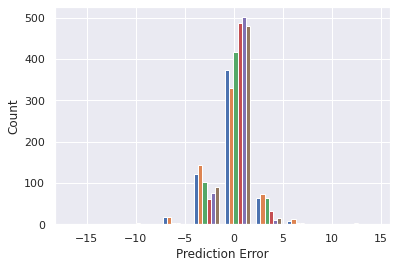

In [ ]:
error = y_pred - y_truth
plt.hist(error, bins=10)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [ ]:
#GROUND view PREDICTIONS
y_pred_01 = y_pred[:,4]
print(y_pred_01.shape)

(587,)


In [ ]:
#GROUND view TRUTH
y_truth_01 = y_truth[:,4]
print(y_truth_01.shape)

(587,)


In [ ]:
buildingDepth = (scalerX.inverse_transform(X_test)[:,4])

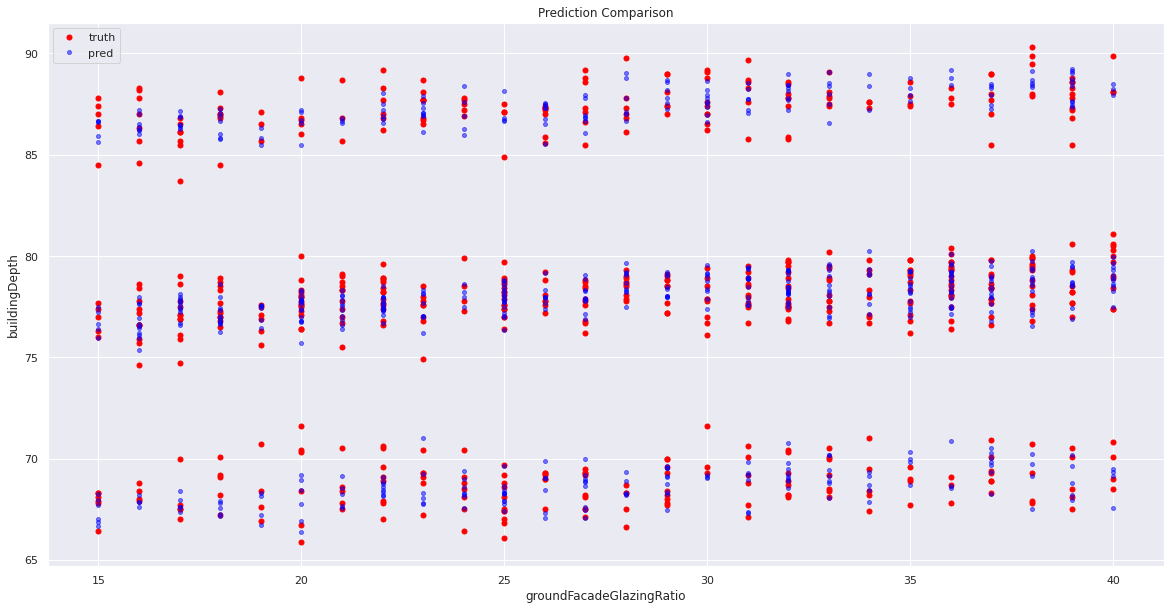

In [ ]:
#PLOT  
plot_comparison(buildingDepth, y_pred_01, y_truth_01, "groundFacadeGlazingRatio", "buildingDepth")

model saving

In [ ]:
#https://www.tensorflow.org/guide/keras/save_and_serialize
model.save("/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/atriumModel1.h5")



scalerX_filename = "/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/scalerXAtoB.save"
joblib.dump(scalerX, scalerX_filename)

scalerY_filename = "/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/scalerYAtoB.save"
joblib.dump(scalerY, scalerY_filename)


['/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/scalerYAtoB.save']